In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [7]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\allen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
def process2(text):
    # lowercase it
    text = text.lower()
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # return token list
    return text

In [10]:
process2('Why are you like this')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\allen/nltk_data'
    - 'c:\\Program Files\\Python310\\nltk_data'
    - 'c:\\Program Files\\Python310\\share\\nltk_data'
    - 'c:\\Program Files\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\allen\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
process2('y r u like this')

['r', 'u', 'like']

In [ ]:
df.columns = ['label', 'message']
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Text(0.5, 0, 'Message Length')

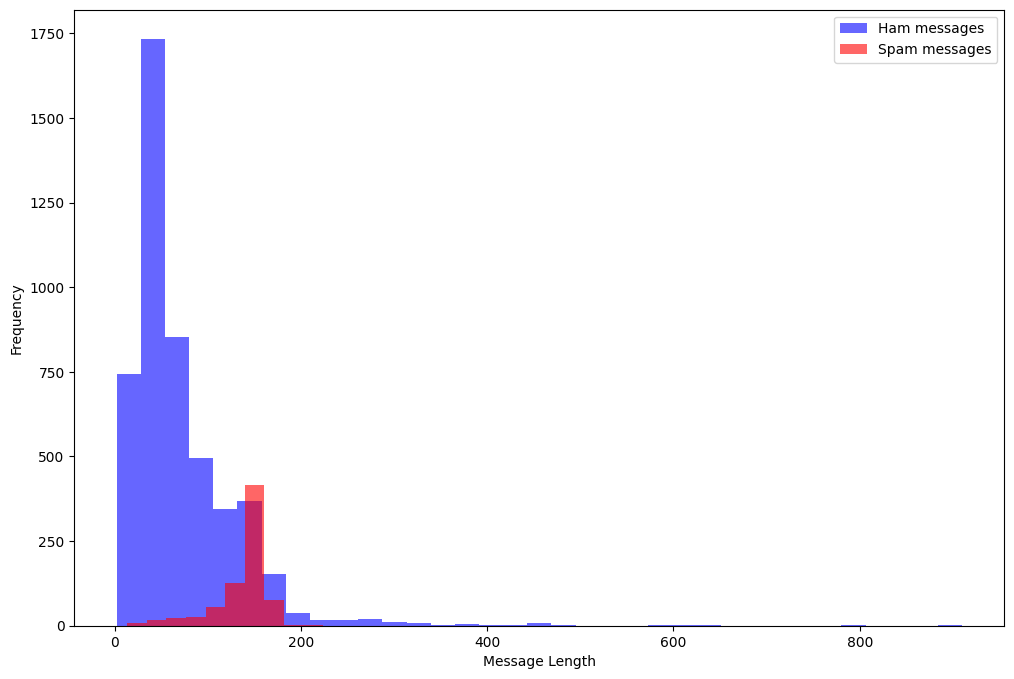

In [ ]:
df['message_len'] = df.message.apply(len)
plt.figure(figsize=(12, 8))

df[df.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
df[df.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [ ]:
df[df.message_len == 2]

,label,message,message_len
1924,ham,Ok,2
3049,ham,Ok,2
4496,ham,Ok,2
5357,ham,Ok,2


In [ ]:
df['clean'] = df['message'].apply(process2)

In [ ]:
df

,label,message,message_len,clean
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, dont, think, goe, usf, live, around, tho..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,"[2nd, time, tri, 2, contact, u, u, å£750, poun..."
5568,ham,Will Ì_ b going to esplanade fr home?,37,"[ì, b, go, esplanad, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"[piti, mood, soani, suggest]"
5570,ham,The guy did some bitching but I acted like i'd...,125,"[guy, bitch, act, like, id, interest, buy, som..."


In [ ]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})

In [ ]:
df

,label,message,message_len,clean,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazi, avail, bugi, n, gre...",0
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joke, wif, u, oni]",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",1
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, earli, hor, u, c, alreadi, say]",0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, dont, think, goe, usf, live, around, tho...",0
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,"[2nd, time, tri, 2, contact, u, u, å£750, poun...",1
5568,ham,Will Ì_ b going to esplanade fr home?,37,"[ì, b, go, esplanad, fr, home]",0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,"[piti, mood, soani, suggest]",0
5570,ham,The guy did some bitching but I acted like i'd...,125,"[guy, bitch, act, like, id, interest, buy, som...",0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.message
y = df.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(5572,)
(4179,)
(1393,)
(4179,)
(1393,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4179, 7496)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 7496)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
spam_filter = Pipeline([
    ('bow', CountVectorizer(analyzer=process2)), 
    ('classifier', MultinomialNB())                    # train on TFIDF vectors with Naive Bayes
])

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.naive_bayes import MultinomialNB
# spam_filter = Pipeline([
#     ('vectorizer', TfidfVectorizer(analyzer=process2)), # messages to weighted TFIDF score
#     ('classifier', MultinomialNB())                    # train on TFIDF vectors with Naive Bayes
# ])

In [ ]:
spam_filter.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process2 at 0x7f107a6e3be0>)),
                ('classifier', MultinomialNB())])

In [ ]:
from sklearn import metrics
ypred = spam_filter.predict(X_test)
print(metrics.accuracy_score(y_test, ypred))

0.9842067480258435


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1221
           1       0.92      0.96      0.94       172

    accuracy                           0.98      1393
   macro avg       0.96      0.97      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
def check(s):
    out = spam_filter.predict([s])[0]
    return 'ham' if int(out)==0 else 'spam'

In [ ]:
check('''hi da navaneeth great fre guy who has no other discount shop job''')

'ham'

In [ ]:
check('''Attend upGrad's International University Fair in Chennai on Sunday, 28th May 2023. By invitation only.

Register Now: https://bit.ly/gue_chennai

upGrad Abroad''')

'spam'